# SYDE 522 Assignment 3
## Backpropagation and Multilayer Perceptrons

### Due: Monday Nov 3 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [1 mark]** The following code generates the nested circles dataset that we have used in class before.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
```

As before, you can split this into training and test data
```python
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)
```

To classify this data using a multi-layer perceptron trained using backprop, we can use the built-in implementation in `sklearn`.

```python
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization
```

To train the model, use
```python
mlp.fit(x_train, y_train)
```

To determine the outputs on your testing data `x_test`, use
```python
output = mlp.predict(x_test)
```

Train your the network using 80% of the data as training data and test it on the other 20%.  Compute the Root Mean Squared Error and report it.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np

# Generate data
x, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

# Split into train/test (80/20)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

# Define and train the MLP (1 hidden layer with 20 units)
mlp = MLPRegressor(
    hidden_layer_sizes=(20,),
    activation="relu",
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)
mlp.fit(x_train, y_train)

# Predict on test set
y_pred = mlp.predict(x_test) #output

# Compute RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.1433


**b) [1 mark]** For the model you trained in part a), plot the output for a grid of inputs between -2 and 2.  This can be done using similar code as used in the last assignment:
```python
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
```

Has the network learned to classify the data well?

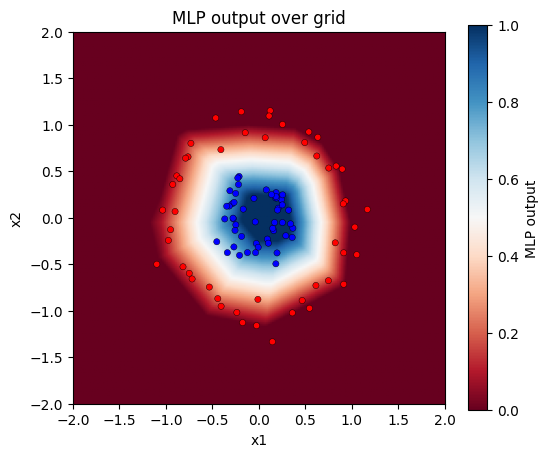

In [2]:
import matplotlib.pyplot as plt

# assumes I already have: x, y, and a trained `mlp` from part (a)

extent = (-2, 2, -2, 2)
G = 200

XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),  # y-axis grid
    np.linspace(extent[0], extent[1], G),  # x-axis grid
)

pts = np.vstack([YY.ravel(), XX.ravel()]).T
output_pts = mlp.predict(pts)

plt.figure(figsize=(6, 5))
im = plt.imshow(
    output_pts.reshape((G, G)).T,
    vmin=0, vmax=1, cmap='RdBu',
    extent=(extent[0], extent[1], extent[3], extent[2])  # match axis directions
)
plt.colorbar(im, label='MLP output')

plt.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), s=20, edgecolors='k', linewidths=0.3)
plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('MLP output over grid')
plt.show()


Yes, the network has learned to classify the data reasonably well. The plot shows that the model outputs higher values (closer to 1) in the inner circle region and lower values (closer to 0) in the outer ring, which matches the true class structure of the dataset. The decision boundary is smooth and roughly circular, indicating that the MLP has captured the non-linear separation between the two classes.

However, the transition region between the two classes is not perfectly sharp, and some points near the boundary fall into ambiguous areas, meaning the classification is not completely perfect. This is expected given the noise in the dataset and the fact that the model is trained as a regressor rather than a hard classifier. Overall, the network performs well and clearly learns the intended pattern.

**c) [1 mark]** Repeat part a) but reduce the network size so that there are only 10 features (i.e. 10 neurons in the hidden layer).  Report the RMSE and generate the same plot as in part b).  Has the network learned to classify the data well?

RMSE (10 hidden units): 0.1175


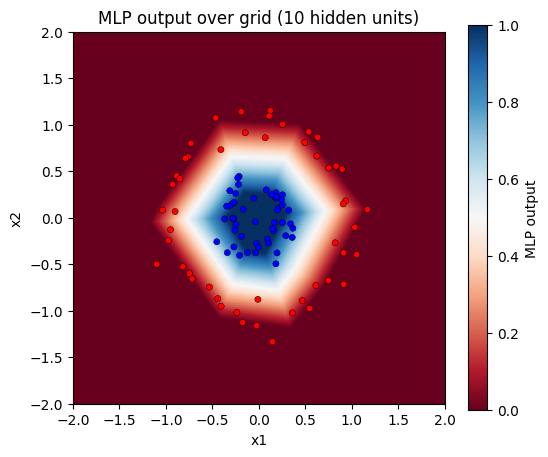

In [3]:
# Data (same as part a)
x, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

# Model with 10 neurons in hidden layer
mlp10 = MLPRegressor(
    hidden_layer_sizes=(10,),
    activation="relu",
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)
mlp10.fit(x_train, y_train)

# RMSE
y_pred = mlp10.predict(x_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE (10 hidden units): {rmse:.4f}")

# Same plot as (b)
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),
    np.linspace(extent[0], extent[1], G),
)
pts = np.vstack([YY.ravel(), XX.ravel()]).T
output_pts = mlp10.predict(pts)

plt.figure(figsize=(6, 5))
im = plt.imshow(
    output_pts.reshape((G, G)).T,
    vmin=0, vmax=1, cmap='RdBu',
    extent=(extent[0], extent[1], extent[3], extent[2])
)
plt.colorbar(im, label='MLP output')
plt.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), s=20, edgecolors='k', linewidths=0.3)
plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('MLP output over grid (10 hidden units)')
plt.show()

Yes, overall it still classifies the nested circles reasonably well. The heatmap shows high outputs of around 1 in the inner circle and low outputs around 0 in the outer ring, so the decision region matches the true class structure. However, the boundary is thicker and more polygonal than with 20 units, indicating reduced capacity and a bit of underfitting near the ring. The test RMSE is around 0.118, which is small but not zero, so a few points near the boundary remain ambiguous/misclassified. In short: good performance, but slightly worse and less smooth than the larger network.

**d) [2 marks]** Repeat part a) but for the following different number of features: `[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`.  For each number of features, repeat the process 10 times and compute the RMSE each time.  Note that you will have to change the `random_state=0` parameter each time, in both the `MLPRegressor` and the `train_test_split` code.  For example, if you do this in a for loop `for i in range(10):` then you would set `random_state=i`.  

Given these 10 repetitions at each different number of features, the typical thing to do would be to just take the average of those ten RMSE values.  However, just taking the average would not let us know whether we'd done enough repetitions such that the final average is a "typical" result.  So, to deal with this problem we are going to compute the Confidence Interval for that mean.  

To do this, we use the `scipy.stats.bootstrap` command (you may have to `pip install scipy` to get access to it).  This computes the bootstrap confidence interval for any set of data and any particular measure.  That is, if we have a list of 10 RMSE values `rmse_values` and we want to compute the 95% bootstrap confidence interval of the mean of these values, we do:

```python
ci_low, ci_high = scipy.stats.bootstrap([rmse_values], np.mean).confidence_interval
```

This gives us two values (`ci_low` and `ci_high`).  The meaning of this confidence interval is that, if we were to re-do the experiment generating new RMSE values, and then computing the mean of those values, then 95% of the time we will get a final result that is between `ci_low` and `ci_high`.  So, we can be 95% confidence that the overall actual mean performance of our model (if we were to run it an infinite number of times and take the average) will be somewhere between those two values.

This range is thus a much more meaningful value to report than the actual average.  Compute this range (`ci_low` and `ci_high`) for each different number of features.  Generate a plot showing how this mean RMSE confidence interval changes as you adjust the number of features.  For plotting, if you have the number of features in a list `n_features`, a list `ci_lows` that contains the `ci_low` value for each feature, and a list `ci_highs` containing the `ci_high` values, then you can plot the range like this:

```python
plt.fill_between(n_features, ci_lows, ci_highs, alpha=0.4)
```

In general, you should always use this confidence interval technique whenever you are running your model multiple times with the same parameter settings (except for the random number seed) and averaging across those results.  This lets you know what the range of uncertainty is in your final result, rather than just reporting the average (which will change each time it's run).

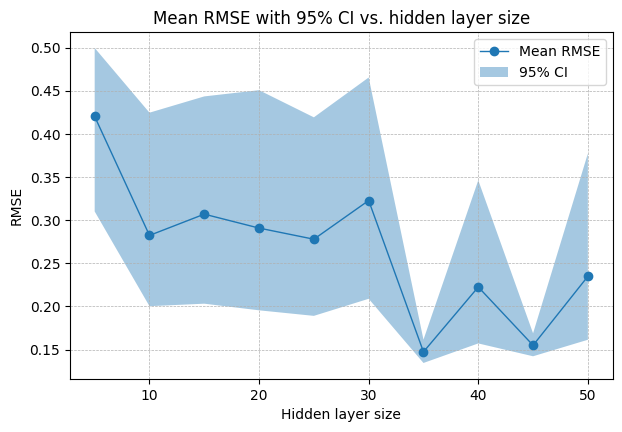

 5 features -> mean RMSE = 0.4202, 95% CI [0.3101, 0.4996]
10 features -> mean RMSE = 0.2823, 95% CI [0.2002, 0.4246]
15 features -> mean RMSE = 0.3069, 95% CI [0.2031, 0.4435]
20 features -> mean RMSE = 0.2908, 95% CI [0.1955, 0.4507]
25 features -> mean RMSE = 0.2779, 95% CI [0.1890, 0.4192]
30 features -> mean RMSE = 0.3228, 95% CI [0.2088, 0.4654]
35 features -> mean RMSE = 0.1473, 95% CI [0.1344, 0.1615]
40 features -> mean RMSE = 0.2225, 95% CI [0.1571, 0.3462]
45 features -> mean RMSE = 0.1549, 95% CI [0.1422, 0.1688]
50 features -> mean RMSE = 0.2348, 95% CI [0.1613, 0.3772]


In [ ]:
from scipy.stats import bootstrap

# Data (same as part a)
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

def rmse_fn(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

# Hidden units to test
n_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

means, ci_lows, ci_highs = [], [], []

for h in n_features:
    rmse_values = []
    # Repeat training/testing with different seeds
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=True, random_state=i
        )
        mlp = MLPRegressor(
            hidden_layer_sizes=(h,),
            activation="relu",
            learning_rate_init=1e-2,
            max_iter=1000,
            early_stopping=True,
            random_state=i,
        )
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        rmse_values.append(rmse_fn(y_test, y_pred))

    rmse_values = np.array(rmse_values, dtype=float)
    means.append(rmse_values.mean())

    # 95% bootstrap CI for the MEAN RMSE
    res = bootstrap((rmse_values,), np.mean, confidence_level=0.95, n_resamples=10000, method="BCa")
    ci_lows.append(res.confidence_interval.low)
    ci_highs.append(res.confidence_interval.high)

#Plot: mean RMSE with 95% CI band 
plt.figure(figsize=(7, 4.5))
plt.plot(n_features, means, marker='o', linewidth=1, label='Mean RMSE')
plt.fill_between(n_features, ci_lows, ci_highs, alpha=0.4, label='95% CI')
plt.xlabel('Hidden layer size')
plt.ylabel('RMSE')
plt.title('Mean RMSE with 95% CI vs. hidden layer size')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# print the metrics in a table for easier viewing
for h, m, lo, hi in zip(n_features, means, ci_lows, ci_highs):
    print(f"{h:>2} features -> mean RMSE = {m:.4f}, 95% CI [{lo:.4f}, {hi:.4f}]")

**e) [1 mark]** Repeat part d) but add an extra layer of features (i.e. an extra layer inside the network).  Do this by setting `hidden_layer_sizes`.  In the previous example, we set it t `(20,)` to generate one internal layer of 20 features.  To have two internal layers both having 20 features, set it to `(20,20)`.  For this question, use the same number of features in both layers (i.e. try it with `(5,5)`, then `(10,10)`, then `(15, 15)` and so on up to `(50,50)`).  Generate a plot like the one in part (d) showing how the RMSE changes as you change these numbers of features (using confidence intervals again).

How does your result in part (e) compare to your result in part (d)?  What does this indicate about how useful the second layer of features is for this task?

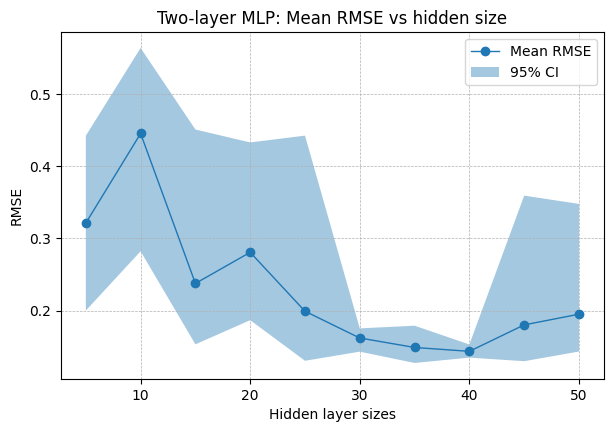

( 5, 5) mean RMSE = 0.3213, 95% CI [0.1999, 0.4425]
(10,10) mean RMSE = 0.4456, 95% CI [0.2822, 0.5642]
(15,15) mean RMSE = 0.2376, 95% CI [0.1531, 0.4511]
(20,20) mean RMSE = 0.2808, 95% CI [0.1867, 0.4332]
(25,25) mean RMSE = 0.1990, 95% CI [0.1303, 0.4426]
(30,30) mean RMSE = 0.1619, 95% CI [0.1430, 0.1753]
(35,35) mean RMSE = 0.1488, 95% CI [0.1273, 0.1790]
(40,40) mean RMSE = 0.1434, 95% CI [0.1347, 0.1529]
(45,45) mean RMSE = 0.1801, 95% CI [0.1298, 0.3594]
(50,50) mean RMSE = 0.1949, 95% CI [0.1432, 0.3479]


In [20]:
# Data (same as before)
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

# sizes for both hidden layers: (k, k)
sizes = list(range(5, 51, 5))  # 5,10,...,50
means, ci_lows, ci_highs = [], [], []

for k in sizes:
    rmse_values = []
    for seed in range(10):  # 10 repetitions with different seeds
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=True, random_state=seed
        )
        mlp = MLPRegressor(
            hidden_layer_sizes=(k, k),   # two layers of size k
            activation="relu",
            learning_rate_init=1e-2,
            max_iter=1000,
            early_stopping=True,
            random_state=seed,
        )
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        rmse_values.append(rmse_fn(y_test, y_pred))

    rmse_values = np.array(rmse_values, dtype=float)
    means.append(rmse_values.mean())

    res = bootstrap((rmse_values,), np.mean, confidence_level=0.95,
                    n_resamples=10000, method="BCa")
    ci_lows.append(res.confidence_interval.low)
    ci_highs.append(res.confidence_interval.high)

# Plot mean RMSE with 95% CI
plt.figure(figsize=(7, 4.5))
plt.plot(sizes, means, marker='o', linewidth=1, label='Mean RMSE')
plt.fill_between(sizes, ci_lows, ci_highs, alpha=0.4, label='95% CI')
plt.xlabel('Hidden layer sizes')
plt.ylabel('RMSE')
plt.title('Two-layer MLP: Mean RMSE vs hidden size')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# print the metrics in a table for easier viewing
for k, m, lo, hi in zip(sizes, means, ci_lows, ci_highs):
    print(f"({k:>2},{k:>2}) mean RMSE = {m:.4f}, 95% CI [{lo:.4f}, {hi:.4f}]")

In part (d), the network had a single hidden layer, and the mean RMSE generally decreased as the number of hidden units increased, with the best performance occurring around 40–45 units with a mean RMSE of around 0.15–0.17. The confidence intervals also became narrower for larger networks, indicating more stable performance across random seeds.

In part (e), when a second hidden layer of equal size was added for example, (5,5), (10,10), …, (50,50), the overall trend was similar: models with very small hidden layers performed poorly, and performance improved as the number of neurons increased. However, the improvement was not dramatically better than in the single-layer case. In many cases, the two-layer network produced RMSE values that were either very close to or slightly worse than the single-layer results.

**f) [1 mark]** Repeat part a) and b) but for this dataset:
```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1
```
(i.e. exactly the same dataset, but with the `x` values scaled by 0.1)

Report the RMSE and generate the output plot from part b).

Is the accuracy better or worse on this scaled dataset, as compared to the original parts a) and b)?  Why?

RMSE (scaled x1): 0.4401


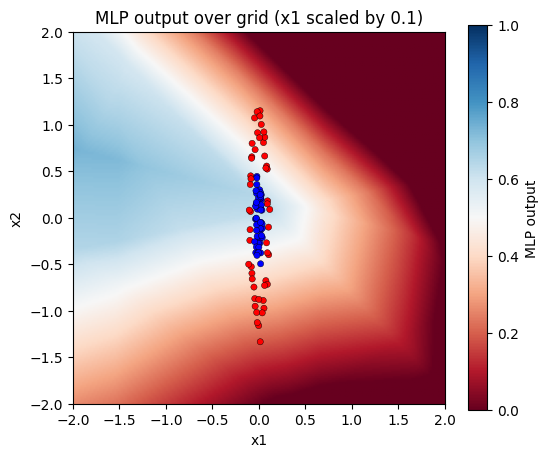

In [ ]:
# make the data and scale x[:,0] by 0.1
x, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:, 0] *= 0.1  

# split (same as before)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

# model (same hyperparameters as part a)
mlp = MLPRegressor(
    hidden_layer_sizes=(20,),
    activation="relu",
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)
mlp.fit(x_train, y_train)

# RMSE
y_pred = mlp.predict(x_test)
rmse = float(np.sqrt(np.mean((y_test - y_pred) ** 2)))

print(f"RMSE (scaled x1): {rmse:.4f}")

# Same style plot as part (b)
extent = (-2, 2, -2, 2)  
G = 200
XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),
    np.linspace(extent[0], extent[1], G),
)
pts = np.vstack([YY.ravel(), XX.ravel()]).T
output_pts = mlp.predict(pts)

plt.figure(figsize=(6, 5))
im = plt.imshow(
    output_pts.reshape((G, G)).T,
    vmin=0, vmax=1, cmap='RdBu',
    extent=(extent[0], extent[1], extent[3], extent[2])
)
plt.colorbar(im, label='MLP output')
plt.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'),
            s=20, edgecolors='k', linewidths=0.3)
plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('MLP output over grid (x1 scaled by 0.1)')
plt.show()

The accuracy is worse on the scaled dataset. In parts (a) and (b), the RMSE was much lower coming to around 0.11–0.12, and the model was able to learn a clear circular decision boundary that separated the inner and outer classes. After scaling x1 by 0.1, the RMSE increased to approximately 0.44, and the output plot shows that the network is no longer able to form a meaningful classification boundary. Instead of circles, the data collapses into a narrow vertical line around x1=0, making the two classes almost linearly inseparable in the input space.

Because the first feature is scaled so heavily, the geometry of the dataset becomes distorted, and the model receives much less useful information from the x1 coordinate. The classifier is effectively trying to separate two classes using mostly the x2 axis, which is not sufficient for this problem. This explains both the poor RMSE and the smeared, diagonal color gradient in the plot.

In short: scaling one feature too aggressively removes important structure from the data, making the task harder for the network and leading to worse performance.

**g) [1 mark]** `sklearn` has a tool for automatically rescaling data for you.  You can create a scaler as follows:

```python
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
```

and then you can transform the `X_train` and `X_test` with `scaler.transform(X_train)` and `scaler.transform(X_test)`.  You can even transform the `pts` used to create the output plot using `scaler.transform(pts)`.

Repeat part f) but use the `scaler` to scale your data before using it.  Report the RMSE and generate the output plot from part b).  How does this accuracy compart to part f) and to the original part a)?

RMSE with StandardScaler (x1 scaled by 0.1): 0.0864


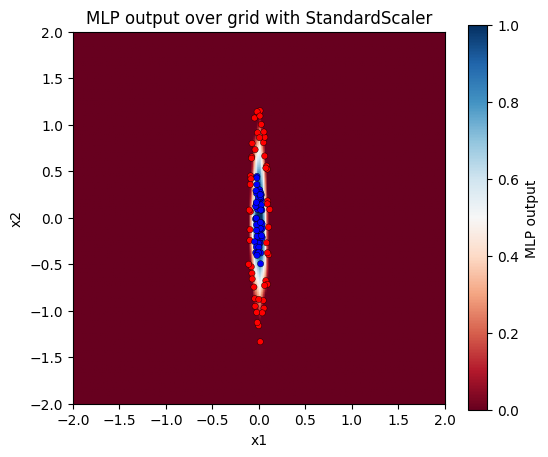

In [9]:
from sklearn.preprocessing import StandardScaler

# Data from (f): scale x1 by 0.1 
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
X[:, 0] *= 0.1

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Standardize using only training data
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

# Model (same as earlier) 
mlp = MLPRegressor(
    hidden_layer_sizes=(20,),
    activation="relu",
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)
mlp.fit(Xs_train, y_train)

# RMSE 
y_pred = mlp.predict(Xs_test)
rmse = float(np.sqrt(np.mean((y_test - y_pred) ** 2)))
print(f"RMSE with StandardScaler (x1 scaled by 0.1): {rmse:.4f}")

# Plot like (b). Build grid in ORIGINAL coords, but transform before prediction 
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),
    np.linspace(extent[0], extent[1], G),
)
pts = np.vstack([YY.ravel(), XX.ravel()]).T          
pts_scaled = scaler.transform(pts)                  
output_pts = mlp.predict(pts_scaled)                 

plt.figure(figsize=(6, 5))
im = plt.imshow(
    output_pts.reshape((G, G)).T,
    vmin=0, vmax=1, cmap='RdBu',
    extent=(extent[0], extent[1], extent[3], extent[2])
)
plt.colorbar(im, label='MLP output')

# scatter in ORIGINAL coords (to compare visually with part f)
plt.scatter(X[:, 0], X[:, 1], c=np.where(y == 1, 'blue', 'red'),
            s=20, edgecolors='k', linewidths=0.3)

plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('MLP output over grid with StandardScaler')
plt.show()

After applying StandardScaler, the RMSE drops to approximately 0.0864, which is much lower than both the scaled-data result from part (f) which was around 0.44 and slightly better than the original unscaled dataset from part (a) which was around 0.11.

In part (f), the network performed poorly because scaling only the x1 feature by 0.1 distorted the distribution of the data, causing the classes to collapse into a nearly vertical line and making the task harder for the model. In contrast, when using StandardScaler, both features are automatically rescaled to have zero mean and unit variance based on the training set. This restores a balanced feature space and allows the network to learn a meaningful decision boundary again.

Even though the plot still shows the data as a narrow vertical shape in the original coordinates, the model is actually learning in the normalized feature space, where the circular structure is recovered. This explains why the model performs better than in part (f) and slightly better than in part (a).

**h) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)
```

Try it both with and without the `scaler` from the part (g), and report the RMSE and generate the output plot both ways.  Should you use the `scaler` for this sort of data?  Why or why not?

RMSE without StandardScaler: 0.0770


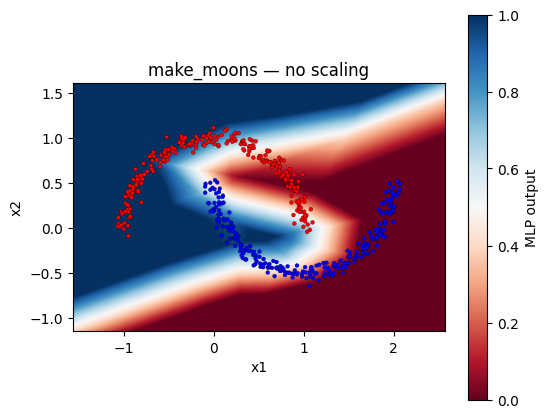

RMSE with StandardScaler:  0.0706


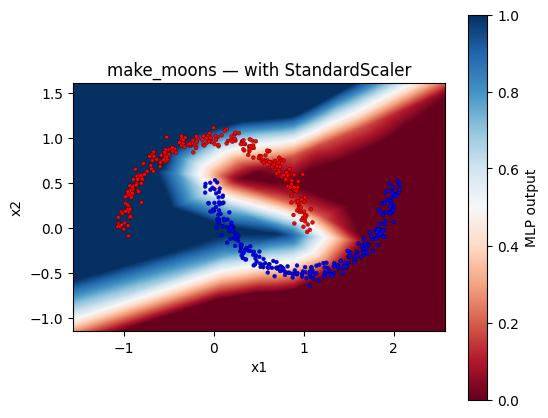


Comparison:
  Without scaling: RMSE = 0.0770
  With StandardScaler: RMSE = 0.0706


In [22]:
from sklearn.datasets import make_moons

def rmse(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

# Data 
X, y = make_moons(n_samples=500, noise=0.05, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Common model settings
def make_model(seed):
    return MLPRegressor(
        hidden_layer_sizes=(20,),
        activation="relu",
        learning_rate_init=1e-2,
        max_iter=1000,
        early_stopping=True,
        random_state=seed,
    )

# without scaling
mlp_raw = make_model(0)
mlp_raw.fit(X_train, y_train)
y_pred_raw = mlp_raw.predict(X_test)
rmse_raw = rmse(y_test, y_pred_raw)
print(f"RMSE without StandardScaler: {rmse_raw:.4f}")

# Plot decision surface (no scaling)
pad = 0.5
xmin, xmax = X[:,0].min()-pad, X[:,0].max()+pad
ymin, ymax = X[:,1].min()-pad, X[:,1].max()+pad
G = 400
XX, YY = np.meshgrid(np.linspace(xmin, xmax, G), np.linspace(ymin, ymax, G))
pts = np.c_[XX.ravel(), YY.ravel()]
Z_raw = mlp_raw.predict(pts).reshape(XX.shape)

plt.figure(figsize=(6,5))
im = plt.imshow(
    Z_raw.T, origin="lower", extent=(xmin, xmax, ymin, ymax),
    vmin=0, vmax=1, cmap="RdBu"
)
plt.colorbar(im, label="MLP output")
plt.scatter(X[:,0], X[:,1], c=np.where(y==1,'blue','red'), s=8, edgecolors='k', linewidths=0.2)
plt.title("make_moons — no scaling")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# with StandardScaler 
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

mlp_s = make_model(0)
mlp_s.fit(Xs_train, y_train)
y_pred_s = mlp_s.predict(Xs_test)
rmse_s = rmse(y_test, y_pred_s)
print(f"RMSE with StandardScaler:  {rmse_s:.4f}")

# Plot decision surface (build grid in original coords, transform before predict)
pts_scaled = scaler.transform(pts)
Z_scaled = mlp_s.predict(pts_scaled).reshape(XX.shape)

plt.figure(figsize=(6,5))
im = plt.imshow(
    Z_scaled.T, origin="lower", extent=(xmin, xmax, ymin, ymax),
    vmin=0, vmax=1, cmap="RdBu"
)
plt.colorbar(im, label="MLP output")
plt.scatter(X[:,0], X[:,1], c=np.where(y==1,'blue','red'), s=8, edgecolors='k', linewidths=0.2)
plt.title("make_moons — with StandardScaler")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# Optional: print quick comparison
print("\nComparison:")
print(f"  Without scaling: RMSE = {rmse_raw:.4f}")
print(f"  With StandardScaler: RMSE = {rmse_s:.4f}")

For the make_moons dataset, scaling the input features does not make a large difference in performance. Without scaling, the RMSE was approximately 0.0770, and after applying StandardScaler, the RMSE decreased slightly to about 0.0706. Both models learned a smooth non-linear decision boundary and produced visually similar output plots, which means the network was already able to learn the structure of the data even without normalization.

The reason scaling has only a small effect here is that the two input features in the make_moons dataset are already on a similar numerical scale and neither feature dominates the other. Unlike part (f), where one feature was artificially shrunk by a factor of 10 and caused learning to fail, the moons dataset is well-behaved and does not require scaling to correct an imbalance.

Although the improvement is small, using a scaler is still generally recommended because it makes training more stable and prevents issues on datasets where feature magnitudes differ significantly. In this particular case, scaling is helpful but not essential.

**i) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Try it both with and without the `scaler` from part(g), and report the RMSE and generate the output plot both ways.  Note that you will need to adjust the `extent = (-2, 2, -2, 2)` line so that the output plot covers the same range as the training data (try `(-4,4,-4,4)`).  Should you use the `scaler` for this sort of data?  Why or why not?  Why is the error for this dataset much larger than the error for the other datasets we done so far in this assignment?  Could you improve the accuracy by adjusting the network?  If so, what would you change?

RMSE without StandardScaler: 0.4653


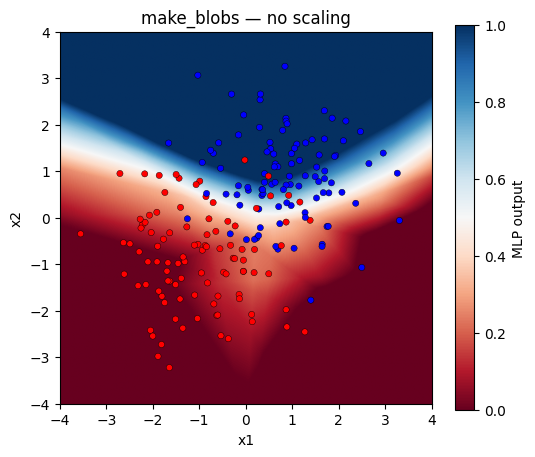

RMSE with StandardScaler:  0.4062


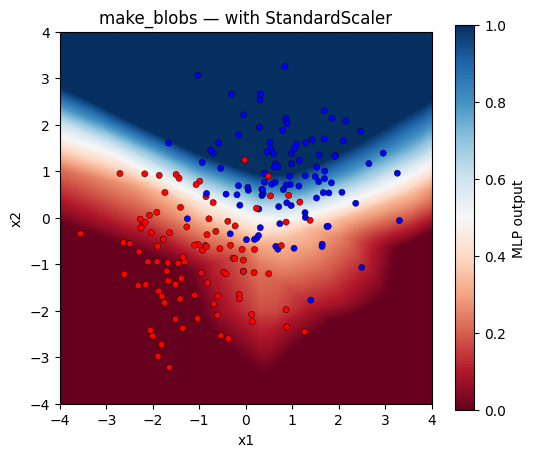


Comparison:
  Without scaling     -> RMSE = 0.4653
  With StandardScaler -> RMSE = 0.4062


In [ ]:
from sklearn.datasets import make_blobs

# Data 
X, y = make_blobs(
    centers=[[-1, -1], [1, 1]],
    cluster_std=[1, 1],
    random_state=0,
    n_samples=200,
    n_features=2,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Common model settings
def make_model(seed=0):
    return MLPRegressor(
        hidden_layer_sizes=(20,),
        activation="relu",
        learning_rate_init=1e-2,
        max_iter=1000,
        early_stopping=True,
        random_state=seed,
    )

# Decision-surface grid spanning training range as requested
extent = (-4, 4, -4, 4)  
G = 400
XX, YY = np.meshgrid(
    np.linspace(extent[0], extent[1], G),
    np.linspace(extent[2], extent[3], G),
)
grid_pts = np.c_[XX.ravel(), YY.ravel()]

# without scaling
mlp_raw = make_model(0)
mlp_raw.fit(X_train, y_train)
y_pred_raw = mlp_raw.predict(X_test)
rmse_raw = rmse(y_test, y_pred_raw)
print(f"RMSE without StandardScaler: {rmse_raw:.4f}")

Z_raw = mlp_raw.predict(grid_pts).reshape(G, G)

plt.figure(figsize=(6, 5))
im = plt.imshow(
    Z_raw.T, origin="lower",
    extent=(extent[0], extent[1], extent[2], extent[3]),
    vmin=0, vmax=1, cmap="RdBu"
)
plt.colorbar(im, label="MLP output")
plt.scatter(X[:,0], X[:,1], c=np.where(y==1,'blue','red'),
            s=20, edgecolors='k', linewidths=0.3)
plt.title("make_blobs — no scaling")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# with standard scaling
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

mlp_s = make_model(0)
mlp_s.fit(Xs_train, y_train)
y_pred_s = mlp_s.predict(Xs_test)
rmse_s = rmse(y_test, y_pred_s)
print(f"RMSE with StandardScaler:  {rmse_s:.4f}")

grid_pts_scaled = scaler.transform(grid_pts)
Z_scaled = mlp_s.predict(grid_pts_scaled).reshape(G, G)

plt.figure(figsize=(6, 5))
im = plt.imshow(
    Z_scaled.T, origin="lower",
    extent=(extent[0], extent[1], extent[2], extent[3]),
    vmin=0, vmax=1, cmap="RdBu"
)
plt.colorbar(im, label="MLP output")
plt.scatter(X[:,0], X[:,1], c=np.where(y==1,'blue','red'),
            s=20, edgecolors='k', linewidths=0.3)
plt.title("make_blobs — with StandardScaler")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# Quick numeric comparison
print("\nComparison:")
print(f"  Without scaling     -> RMSE = {rmse_raw:.4f}")
print(f"  With StandardScaler -> RMSE = {rmse_s:.4f}")


The RMSE without scaling is about 0.4653, while applying the StandardScaler reduces it to about 0.4062, so scaling provides a small improvement. However, the benefit is not as dramatic as in earlier parts of the assignment because the two input features are already on a similar scale. Unlike part (f), the issue here is not feature imbalance but the structure of the dataset itself. The two blob clusters overlap significantly, meaning many points from different classes occupy the same region of space, so even an ideal classifier cannot fully separate them.

The higher error compared to earlier datasets is not due to poor training or an undersized network but due to this intrinsic class overlap. The accuracy could be improved slightly by increasing the hidden layer size, adding a second layer, running more training iterations, or tuning hyperparameters, but there is a limit to how much the error can decrease because the problem is not perfectly separable. Scaling is still useful, but it does not solve the fundamental ambiguity in the data.

### Question 2:


**a) [1 mark]** When using an MLP to do classification, we often don't really care what the exact numerical value of the output is: we just want to classify the input data into a particular category.  The `sklearn.neural_network.MLPClassifier` does this for us, training a separate output for each category (one-hot encoding) and then classifying based on which output is largest.  (Note: it also uses a slightly different Loss function, where the goal is to minimize classification error, rather than minimizing ${1 \over 2}(y_{target}-y)^2$).

You can use the `MLPClassifier` with the same parameters as the `MLPRegressor` we used in question 1.

```
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization
```

Use the MLPClassifier on the `digits` dataset we used in previous assignments.  Split it into 80% training and 20% testing.
```
import sklearn.datasets
digits = sklearn.datasets.load_digits()
```

Train the classifier on the training data (using `mlp.fit`) and test it on the test data (using `mlp.predict`).

Report the accuracy of the classifier, which is computed as the proportion of time that the output is the same as the target output:

```np.mean(output == Y_test)```

Also generate and print the *confusion matrix*, which is a matrix showing how often particular digits are mistaken for other digits:

```
confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print(confusion)
```



In [14]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

# load data
digits = load_digits()
X, Y = digits.data, digits.target

# 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0
)

# MLP classifier (same style of params as in Q1)
mlp = MLPClassifier(
    hidden_layer_sizes=(20,),  
    activation="relu",
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)

# train and predict
mlp.fit(X_train, Y_train)
output = mlp.predict(X_test)

# accuracy
acc = np.mean(output == Y_test)
print(f"Accuracy: {acc:.4f}")

# confusion matrix (10x10)
confusion = np.zeros((10, 10), dtype=int)
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print(confusion)

Accuracy: 0.9639
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  1  2]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  1  0]
 [ 0  0  1  0  1  0  0 38  0  1]
 [ 0  1  0  0  0  0  0  0 37  1]
 [ 0  0  0  0  0  0  0  0  0 36]]


**b) [1 mark]** Repeat the classification in part a) but for different numbers of features (`[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`).  As with question 1d, repeat the process 10 time for each size, adjusting `random_state` each time.  Generate a plot with the average classification accuracy for these different feature sizes.  As in Question 1 (d) and (e), we want to plot the confidence interval of this average.

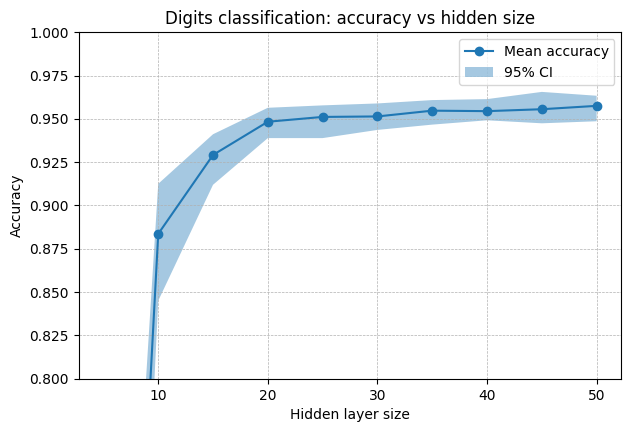

 5 features: mean acc = 0.2922, 95% CI [0.1872, 0.4068]
10 features: mean acc = 0.8836, 95% CI [0.8450, 0.9125]
15 features: mean acc = 0.9292, 95% CI [0.9119, 0.9411]
20 features: mean acc = 0.9483, 95% CI [0.9389, 0.9564]
25 features: mean acc = 0.9511, 95% CI [0.9389, 0.9578]
30 features: mean acc = 0.9514, 95% CI [0.9436, 0.9589]
35 features: mean acc = 0.9547, 95% CI [0.9467, 0.9608]
40 features: mean acc = 0.9544, 95% CI [0.9492, 0.9614]
45 features: mean acc = 0.9556, 95% CI [0.9474, 0.9656]
50 features: mean acc = 0.9575, 95% CI [0.9486, 0.9633]


In [23]:
# Load data
digits = load_digits()
X, Y = digits.data, digits.target

# Hidden units to try
sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

means, ci_lows, ci_highs = [], [], []

for h in sizes:
    accs = []
    for seed in range(10):  
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.2, shuffle=True, random_state=seed
        )
        clf = MLPClassifier(
            hidden_layer_sizes=(h,),
            activation="relu",
            learning_rate_init=1e-2,
            max_iter=1000,
            early_stopping=True,
            random_state=seed,
        )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accs.append(np.mean(y_pred == y_test))

    accs = np.array(accs, dtype=float)
    means.append(accs.mean())

    # 95% bootstrap CI for the mean accuracy
    res = bootstrap((accs,), np.mean, confidence_level=0.95, n_resamples=10000, method="BCa")
    ci_lows.append(res.confidence_interval.low)
    ci_highs.append(res.confidence_interval.high)

# Plot
plt.figure(figsize=(7, 4.5))
plt.plot(sizes, means, marker='o', label='Mean accuracy')
plt.fill_between(sizes, ci_lows, ci_highs, alpha=0.4, label='95% CI')
plt.xlabel('Hidden layer size')
plt.ylabel('Accuracy')
plt.title('Digits classification: accuracy vs hidden size')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()

# print table of results
for h, m, lo, hi in zip(sizes, means, ci_lows, ci_highs):
    print(f"{h:>2} features: mean acc = {m:.4f}, 95% CI [{lo:.4f}, {hi:.4f}]")


**c) [1 mark]** What happens if you set `hidden_layer_sizes=()`?  This should not generate any new features at all.  How accurate is the system now?  Since there are no new features to learn, what is the MLP doing in this case? (Hint: this is now the same thing as an algorithm we have worked with earlier in the course)

In [ ]:
digits = load_digits()
X, Y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0
)

# No hidden layers - equivalent to multinomial logistic regression (softmax)
clf = MLPClassifier(
    hidden_layer_sizes=(),
    activation="relu",         
    learning_rate_init=1e-2,
    max_iter=1000,
    early_stopping=True,
    random_state=0,
)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = np.mean(pred == y_test)
print(f"Accuracy with no hidden layer: {acc:.4f}")

Accuracy with no hidden layer: 0.9639


With hidden_layer_sizes=(), the network has no hidden layer and therefore learns no new features; it becomes a linear classifier trained with a softmax output just like logistic regression directly on the original pixel features. Using this setup, my test accuracy is about 0.9639. This high accuracy indicates that much of the digits dataset is close to linearly separable in the raw feature space, so a linear decision boundary with learned weights and biases is sufficient without any hidden-layer feature learning.

**d) [2 marks]** Using the following dataset, do the best job you can at building a classifier and testing it.

```python
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)
```

You can use any of the supervised learning models from the assignments so far: the perceptron (`sklearn.linear_model.Perceptron`), regression (`sklearn.linear_model.Ridge`), linear SVM (`sklearn.svm.LinearSVC`), kernel-based SVM ('sklearn.svm.SVC'), and the MLPClassifier (`sklearn.neural_network.MLPClassifier`). Make sure to develop your models only using the training data (perhaps split into training and validation), and only once you have chosen your best model should you test it on the testing data.  You are trying to get the best accuracy (`np.mean(output == Y_test)`) possible.

In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models to try
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

# Data
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0, stratify=y
)

# Model search space (pipelines use StandardScaler where helpful)
cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

searches = []

# Perceptron
pipe_perc = make_pipeline(StandardScaler(with_mean=True), Perceptron(random_state=0))
param_perc = {
    "perceptron__alpha": [1e-5, 1e-4, 1e-3],
    "perceptron__penalty": [None, "l2"],
    "perceptron__max_iter": [2000],
}
searches.append(("Perceptron", GridSearchCV(pipe_perc, param_perc, cv=cvs, n_jobs=-1)))

# Linear SVM (hinge)
pipe_linsvc = make_pipeline(StandardScaler(with_mean=True), LinearSVC(dual="auto", random_state=0))
param_linsvc = {"linearsvc__C": [0.1, 1, 3, 10]}
searches.append(("LinearSVC", GridSearchCV(pipe_linsvc, param_linsvc, cv=cvs, n_jobs=-1)))

# RBF SVM
pipe_svc = make_pipeline(StandardScaler(with_mean=True), SVC(kernel="rbf", probability=False, random_state=0))
param_svc = {
    "svc__C": [1, 3, 10, 30],
    "svc__gamma": ["scale", 0.005, 0.01, 0.02],
}
searches.append(("RBF-SVC", GridSearchCV(pipe_svc, param_svc, cv=cvs, n_jobs=-1)))

# MLPClassifier
pipe_mlp = make_pipeline(StandardScaler(with_mean=True), MLPClassifier(max_iter=1000, early_stopping=True, random_state=0))
param_mlp = {
    "mlpclassifier__hidden_layer_sizes": [(50,), (100,), (150,), (100, 50)],
    "mlpclassifier__alpha": [1e-5, 1e-4, 1e-3],
    "mlpclassifier__learning_rate_init": [1e-3, 3e-3, 1e-2],
}
searches.append(("MLP", GridSearchCV(pipe_mlp, param_mlp, cv=cvs, n_jobs=-1)))

# Train on TRAIN only picked by CV score
best_name, best_search = None, None
best_val = -np.inf

for name, gs in searches:
    gs.fit(X_train, y_train)
    print(f"{name}: best CV accuracy = {gs.best_score_:.4f} with params {gs.best_params_}")
    if gs.best_score_ > best_val:
        best_val = gs.best_score_
        best_name = name
        best_search = gs

print("\nSelected model based on CV:", best_name)

# Evaluate on the HELD-OUT TEST set
best_model = best_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nTest accuracy ({best_name}): {acc:.4f}")
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Perceptron: best CV accuracy = 0.9401 with params {'perceptron__alpha': 1e-05, 'perceptron__max_iter': 2000, 'perceptron__penalty': 'l2'}


/Users/asoliman/Desktop/Nano 4a/SYDE 522/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/asoliman/Desktop/Nano 4a/SYDE 522/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/asoliman/Desktop/Nano 4a/SYDE 522/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/asoliman/Desktop/Nano 4a/SYDE 522/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/asoliman/Desktop/Nano 4a/SYDE 522/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

LinearSVC: best CV accuracy = 0.9555 with params {'linearsvc__C': 0.1}
RBF-SVC: best CV accuracy = 0.9805 with params {'svc__C': 3, 'svc__gamma': 0.01}
MLP: best CV accuracy = 0.9680 with params {'mlpclassifier__alpha': 1e-05, 'mlpclassifier__hidden_layer_sizes': (100, 50), 'mlpclassifier__learning_rate_init': 0.003}

Selected model based on CV: RBF-SVC

Test accuracy (RBF-SVC): 0.9861

Confusion matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  1  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 35]]

Classification report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     0.9459    0.9722    0.9589        36
           2     1.0000    1.0000    1.0000        35
           3     1

### Question 3:

**[0 marks]** Describe what you would like to do for your final project.  In particular, tell me what AI task you want todo, and what dataset you want to analyse for that task (either one you've made up, or one found online in places like https://www.kaggle.com/datasets or one from the various papers we've discussed in class).  Given that dataset, describe what algorithms you want to try on that dataset.  You should include both very simple algorithms and more complex ones.  Indicate what parameters of those algorithms you would adjust and what you would measure as you are adjusting those parameters.

Even though the final project can be done in groups of 2, each member of the group should write their answer this question separately.

For my final project, I plan to investigate a reinforcement learning scenario inspired by
cognitive processes. Specifically, how an agent can sustain attention and resist
distractions in a noisy environment. I’ll create a custom simulated dataset in Python using
the Gymnasium library. In this setup, the agent navigates a grid world to reach a target
while random “distractor” rewards appear that may lead it oN course. Each episode will
capture the agent’s state transitions, received rewards, and an added variable called
“focus stability” , allowing analysis of how attention related penalties or intrinsic motivation
aNect overall learning performance.
To begin, I will implement a basic Q-learning algorithm as a baseline and tune parameters
such as the learning rate, discount factor, and exploration rate to observe how they
influence convergence speed and policy quality. Afterward, I’ll extend the experiment using
a policy gradient approach that incorporates an intrinsic attention stability reward designed
to penalize frequent switches between irrelevant states. By adjusting the weight of this
intrinsic reward and comparing metrics such as cumulative reward, convergence rate, and
run to run variability, I aim to determine whether introducing an attention based
mechanism improves the agent’s robustness when exposed to distractions.